<a href="https://colab.research.google.com/github/bryan3342/Boston-Housing-data/blob/main/B_Mejia_Quiz4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Logistic Regression

The banking industry in the USA is highly regulated. Banks are required to adhere to strict guidelines regarding the
 management of customer deposits, the maintaining of customer privacy, and the avoidance of discrimination when
 approving or rejecting loan applications. Many years ago, banks engaged in the practice of “redlining” when approving
 loans for home mortgages, which basically amounted to the automatic rejection of loan applications for homes located
 in certain areas that were deemed by banks to be overly prone to loan defaults. When such practices were deemed to
 be discriminatory by bank regulators, banks adjusted their mortgage lending practices in an attempt to make them more
 objective. However, regulators remain concerned that discrimination can exist even when what appear to be purely
 objective criteria are used for purposes of deciding whether or not a customer is approved for a loan. You’ve been
 tasked by a large banking regulator with the development of a model that can predict whether or not a given mortgage
 loan application is likely to be approved or denied. The regulator plans to use the output of such a model in an attempt
 to identify potential instances of discrimination in the lending practices of the banks for which it is tasked with
 regulating.

To address this problem and develop a model to predict mortgage loan denials, we will follow a structured data science approach:

1.  **Exploratory Data Analysis (EDA):** We will begin by exploring the dataset to understand the variables, their distributions, and their relationships with the target variable ('deny'). This will involve visualizing data and calculating summary statistics.
2.  **Data Preparation:** We will clean the data, handle any missing values or inconsistencies, and perform necessary feature engineering (like converting categorical variables to a numerical format) to prepare it for modeling.
3.  **Prepped Data Review:** After preparing the data, we will conduct a brief review to ensure the data is in the correct format and that our preparation steps were successful.
4.  **Regression Modeling:** We will build several binomial logistic regression models using different combinations of explanatory variables selected based on our EDA and domain knowledge.
5.  **Model Evaluation and Selection:** We will evaluate the performance of each model using appropriate metrics and select the best-performing model based on predefined criteria relevant to the problem of identifying potential discrimination.

# Exploratory Data Analysis (EDA)

Within this dataset, we have 13 variables that help us determine whether or not an individual could be accepted for their mortgage application.<br> The dataset comprises of 2,381 observations of 1 response/dependent variable (which indicates whether or not a mortgage application was denied) and 12 explanatory/independent variables.

**<h2> Variables and Descriptions: </h2>**
Based on https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html, we take a look at the meanings of the variables and how they interact with one another. We seem to be dealing with single use applicants per data entry.



*   **<h3>dir:</h3>**<i> Debt payments to total income ratio.</i>
*   **<h4>hir: </h4>** <i> Housing expenses to income ratio.</i>
*   **<h4>lvr: </h4>** <i> Ratio of size of load to assessed value of property. </i>
*   **<h4>ccs: </h4>** <i> Consumer credit score from 1 to 6 (a low value being a good score) </i>
*   **<h4>mcs: </h4>** <i> Mortgage credit score from 1 to 4 (a low value being a good score) </i>
*   **<h4>pbcr: </h4>** <i> Does the applicant have a  public bad credit record? </i>
*   **<h4>dmi: </h4>** <i> Has the applicant had a denied mortgage insurance?</i>
*   **<h4>self: </h4>** <i> Is the applicant self employed? </i>
*   **<h4>single: </h4>** <i> Is the applicant of single status? </i>
*   **<h4>uria: </h4>** <i> 1989 Massachusetts unemployment rate in applicant's industry </i>
*   **<h4>condominium: </h4>** <i> Is the applicant's unit a condominium? </i>
*   **<h4>black: </h4>** <i> Is the applicant black? </i>
*   **<h4>deny: </h4>** <i> Has the mortgage application been denied? </i>


After carefully analyzing every variable and it's meaning, we begin extracting the data using a pandas dataframe and prepare the data for further analysis.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/bryan3342/Boston-Housing-data/refs/heads/main/HDMA%20Boston%20Housing%20Data.csv'

df = pd.read_csv(url, header=None, quotechar='"')

df.columns = ["temp"]
df = df["temp"].str.split(",", expand=True)

df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df = df.drop(columns=df.columns[0])


display(df.head())
display(df.info())

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221000004,0.221000004,0.8,5,2,no,no,no,no,3.900000095,0,no,no
1,0.265,0.265,0.921875,2,2,no,no,no,yes,3.200000048,0,no,no
2,0.372000008,0.247999992,0.92039801,1,2,no,no,no,no,3.200000048,0,no,no
3,0.32,0.25,0.860465116,1,2,no,no,no,no,4.300000191,0,no,no
4,0.36,0.35,0.6,1,1,no,no,no,no,3.200000048,0,no,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dir          2381 non-null   object
 1   hir          2381 non-null   object
 2   lvr          2381 non-null   object
 3   ccs          2381 non-null   object
 4   mcs          2381 non-null   object
 5   pbcr         2381 non-null   object
 6   dmi          2381 non-null   object
 7   self         2381 non-null   object
 8   single       2381 non-null   object
 9   uria         2381 non-null   object
 10  comdominiom  2381 non-null   object
 11  black        2381 non-null   object
 12  deny         2381 non-null   object
dtypes: object(13)
memory usage: 241.9+ KB


None

# Correctly Assigning Data Types
We see there's an issue with our data, as it was all encapsulated into quotes; making every data entry a string. This makes the pandas library difficult to parse the information into a dataframe properly, so we have to convert the variables into their appropriate data types.

In [67]:
cols_to_exclude = ['pbcr', 'dmi', 'self', 'single', 'black','deny']

for col in df.columns:
  if col not in cols_to_exclude:
    df[col] = pd.to_numeric(df[col], errors='coerce')

display(df.head())
display(df.info())


,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dir          2381 non-null   float64
 1   hir          2381 non-null   float64
 2   lvr          2381 non-null   float64
 3   ccs          2381 non-null   float64
 4   mcs          2381 non-null   float64
 5   pbcr         2381 non-null   object 
 6   dmi          2381 non-null   object 
 7   self         2381 non-null   object 
 8   single       2381 non-null   object 
 9   uria         2381 non-null   float64
 10  comdominiom  2381 non-null   int64  
 11  black        2381 non-null   object 
 12  deny         2381 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 241.9+ KB


None

# Converting Categorical Variables into Numerical Representation
Before we're able to use the data in a machine learning model and prepare the data for linear regression modeling, we need to have numerical values. The input data needs to be in numerical format to have mathematical operations performed on the data. We can represent categories of "yes/no" as numerical representations.

# One-Hot Encoding
To transform object data type variables into numerical ones, we perform **One-Hot Encoding**. Using this method, we're able to turn the "yes/no" values into binary ones. Using the get_dummies method, we're able to create new columns into their respective binary values for easier data manipulation.

In [70]:
# Drop the last row as it appears to be an aggregation
df = df.drop(df.index[-1])

# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['pbcr', 'dmi', 'self', 'single', 'black'], drop_first=True)

# Convert the 'deny' column to numerical (0 for 'no', 1 for 'yes')
df['deny'] = df['deny'].apply(lambda x: 1 if x == 'yes' else 0)

display(df.head())
display(df.info())

KeyError: "None of [Index(['pbcr', 'dmi', 'self', 'single', 'black'], dtype='object')] are in the [columns]"

# Searching for Values that cannot be used
Now after breaking down the dataset into their appropriate data values, we can see if there are any missing data or invalid values that cannot be used. After searching through the dataset while correcting any invalid data, we can proceed to get it's statistics and occurences for numerical/categorical attributes.

In [72]:
# Finding all NaN values.
display(df.isnull().sum())

# Getting all statistics for numerical variables.
display(df.describe())

,0
dir,0
hir,0
lvr,0
ccs,0
mcs,0
uria,0
comdominiom,0
deny,0
pbcr_yes,0
dmi_yes,0


,dir,hir,lvr,ccs,mcs,uria,comdominiom,deny
count,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000,2379.000000
mean,0.330806,0.255344,0.737744,2.116435,1.720891,3.774275,0.287936,0.119378
std,0.107279,0.096676,0.178782,1.667069,0.537364,2.027459,0.452896,0.324301
min,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000,0.000000
25%,0.280000,0.214000,0.652512,1.000000,1.000000,3.100000,0.000000,0.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000,0.000000
75%,0.370000,0.298850,0.868496,2.000000,2.000000,3.900000,1.000000,0.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000,1.000000


## Visualize numerical variable distributions

Now that we've numerized all of our variable's values, we create histograms and box plots, separated by the 'deny' status, to see if there are noticeable differences in distributions between approved and denied applications.


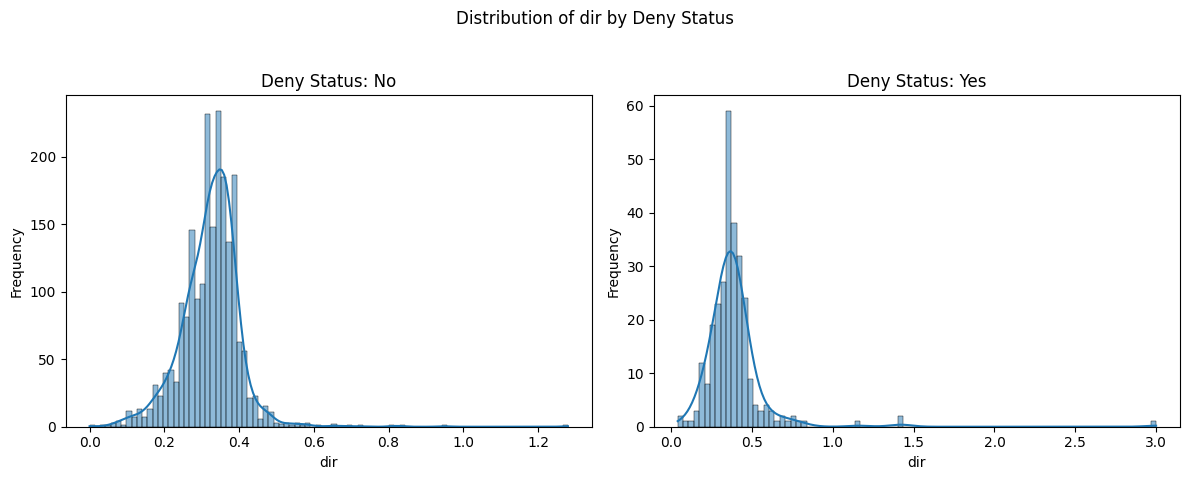

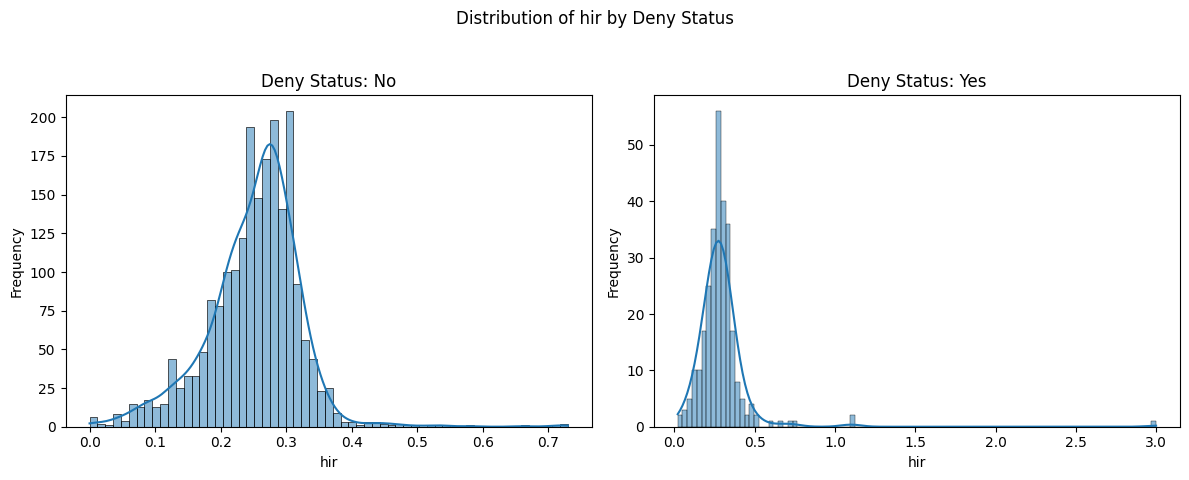

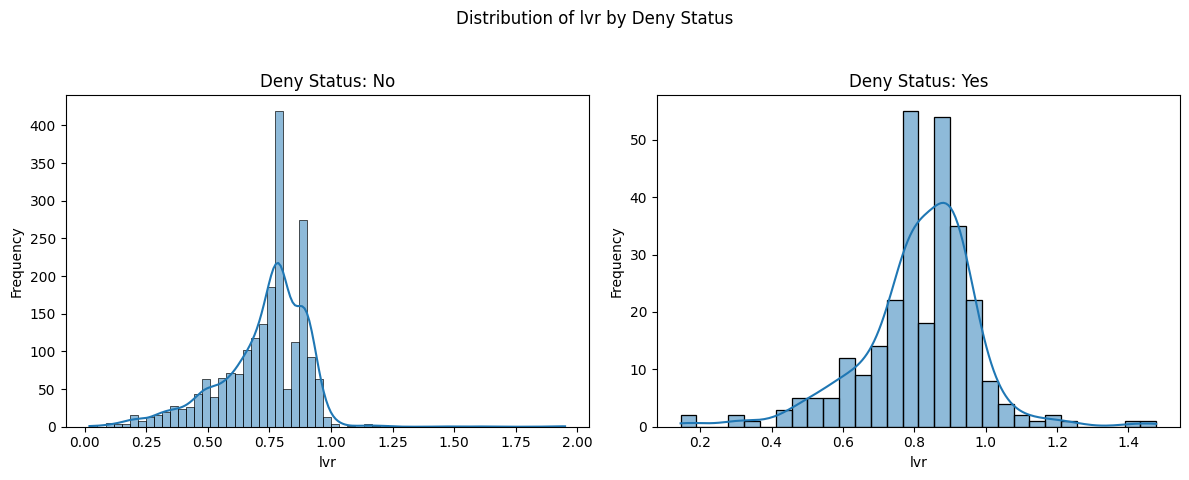

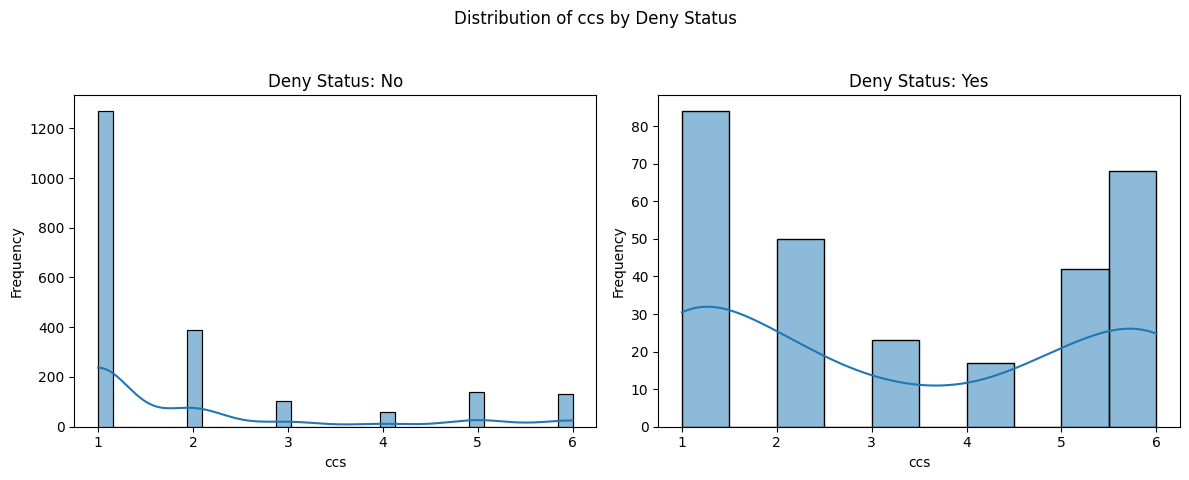

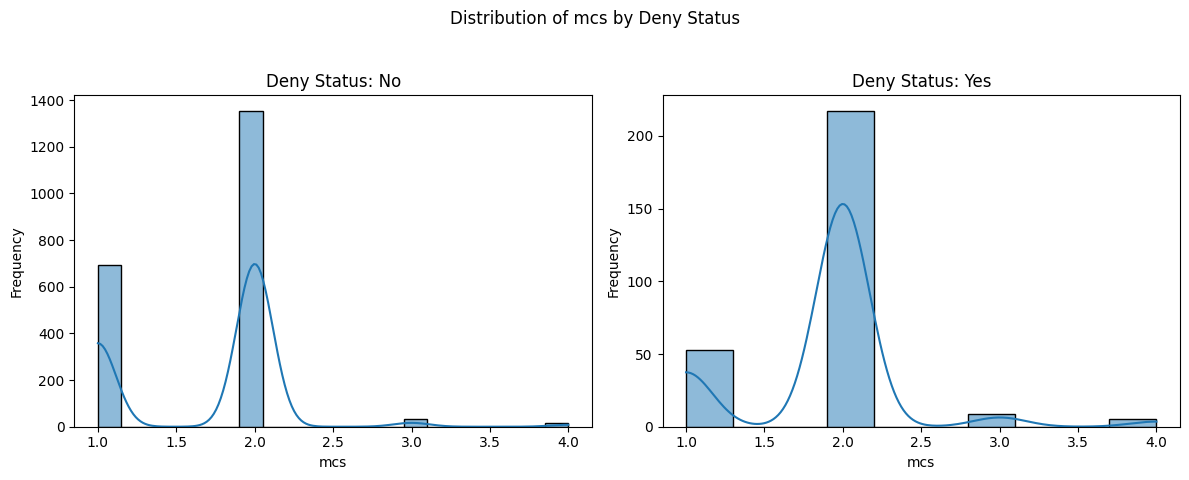

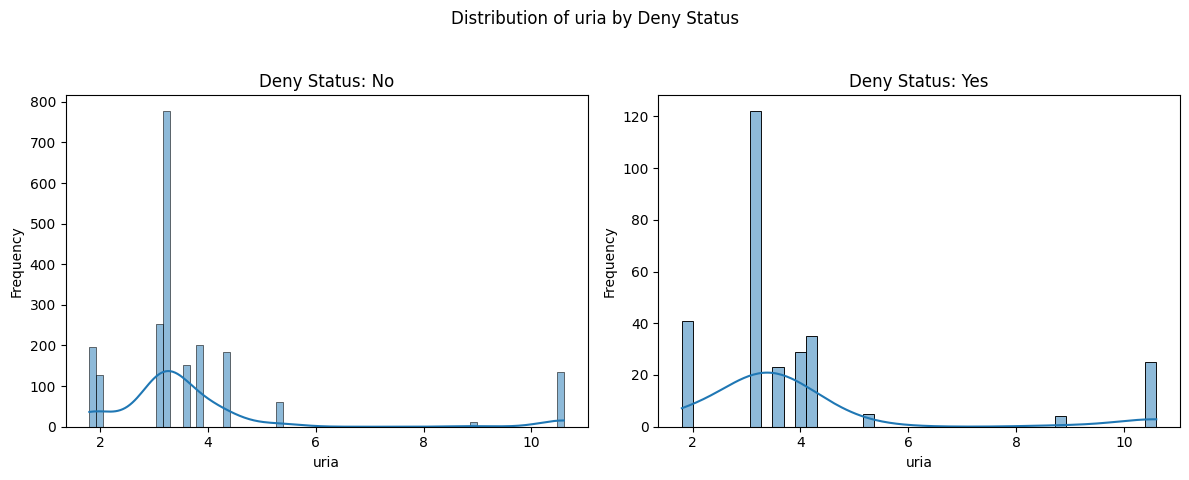

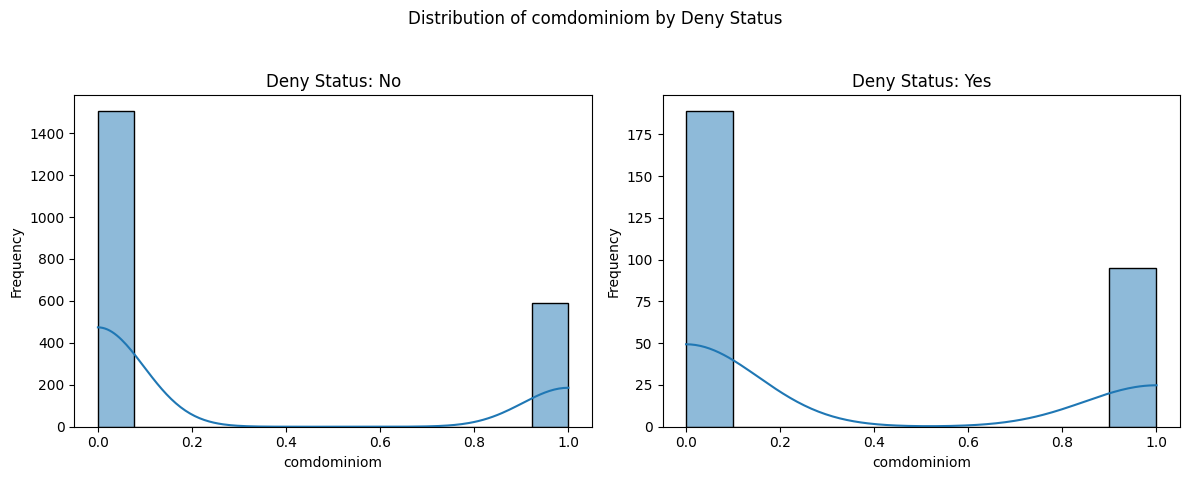

In [73]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('deny')


# Creating for loop for representation of columns depending on Deny Status
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'Distribution of {col} by Deny Status')

# If Deny Status = "No"
    sns.histplot(data=df[df['deny'] == 0], x=col, ax=axes[0], kde=True)
    axes[0].set_title('Deny Status: No')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

# If Deny Status = "Yes"
    sns.histplot(data=df[df['deny'] == 1], x=col, ax=axes[1], kde=True)
    axes[1].set_title('Deny Status: Yes')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Frequency')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Visualize categorical variable counts

We now create bar graphs to visualize the relationship between :

*   Applicant's Deny Status.
*   Applicant's public bad credit record.

*   Denied mortgage insurance.
*   Whether or not they're self employed.

*   If they're black.


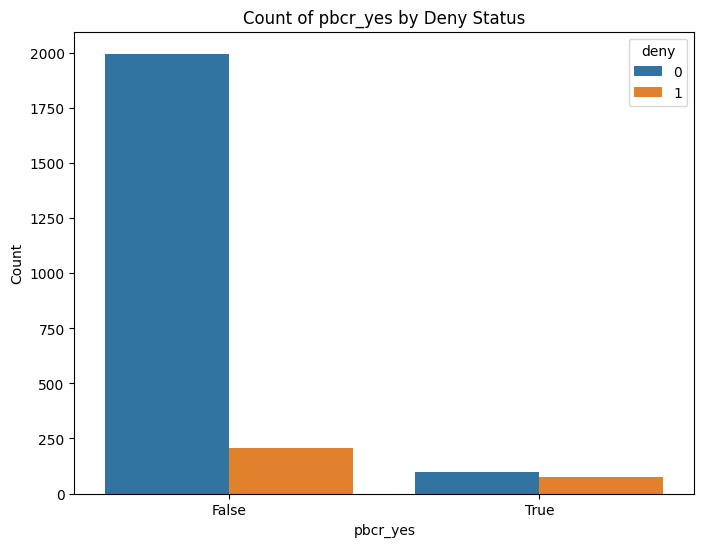

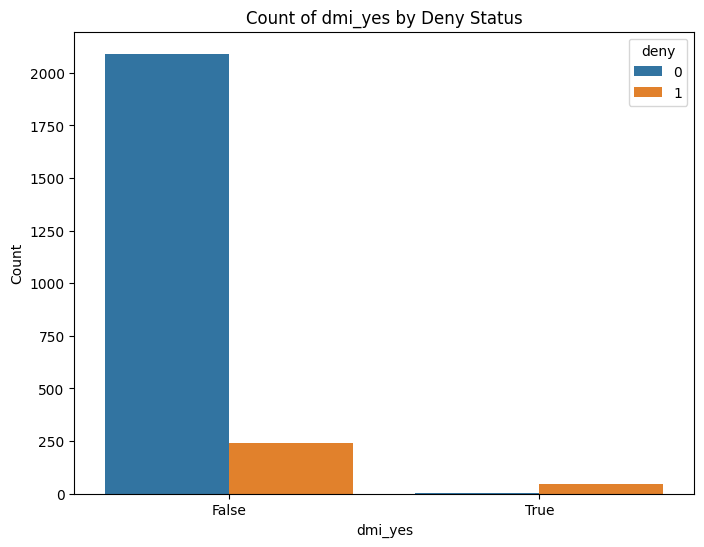

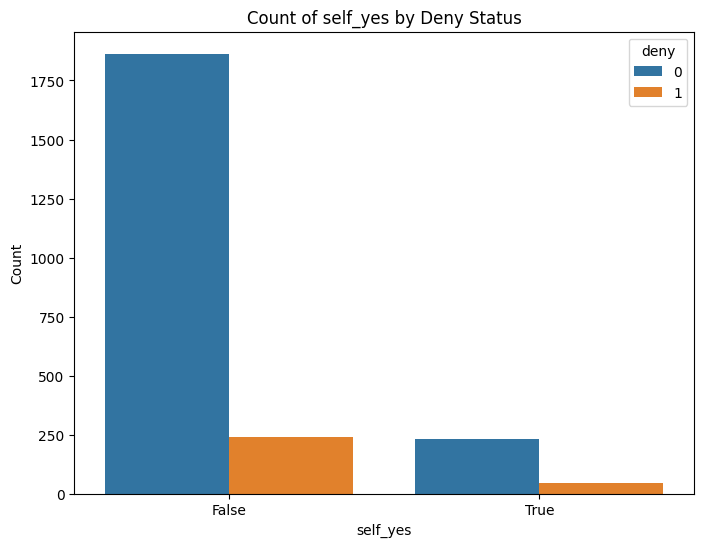

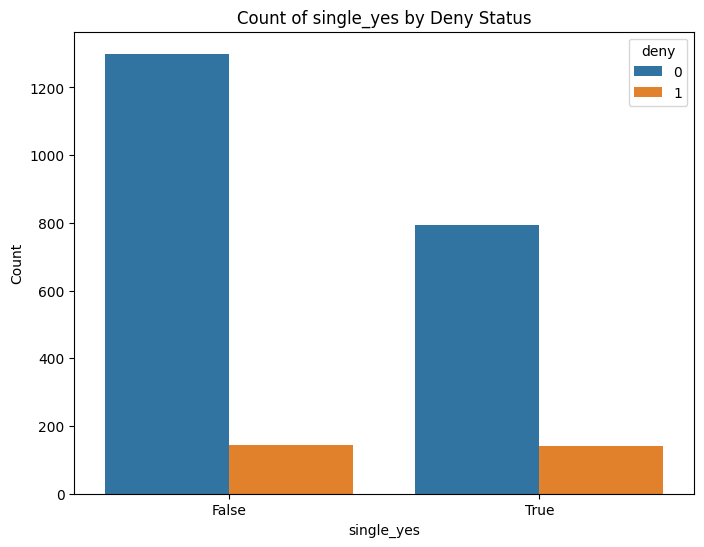

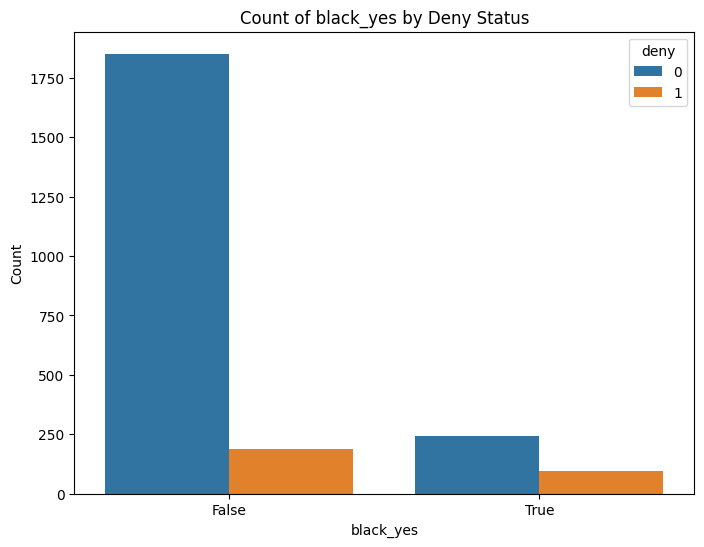

In [74]:
categorical_cols = ['pbcr_yes', 'dmi_yes', 'self_yes', 'single_yes', 'black_yes']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue='deny')
    plt.title(f'Count of {col} by Deny Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Visualize correlation matrix

We then enerate a correlation matrix to see the relationships between all numerical variables, including the 'deny' column.


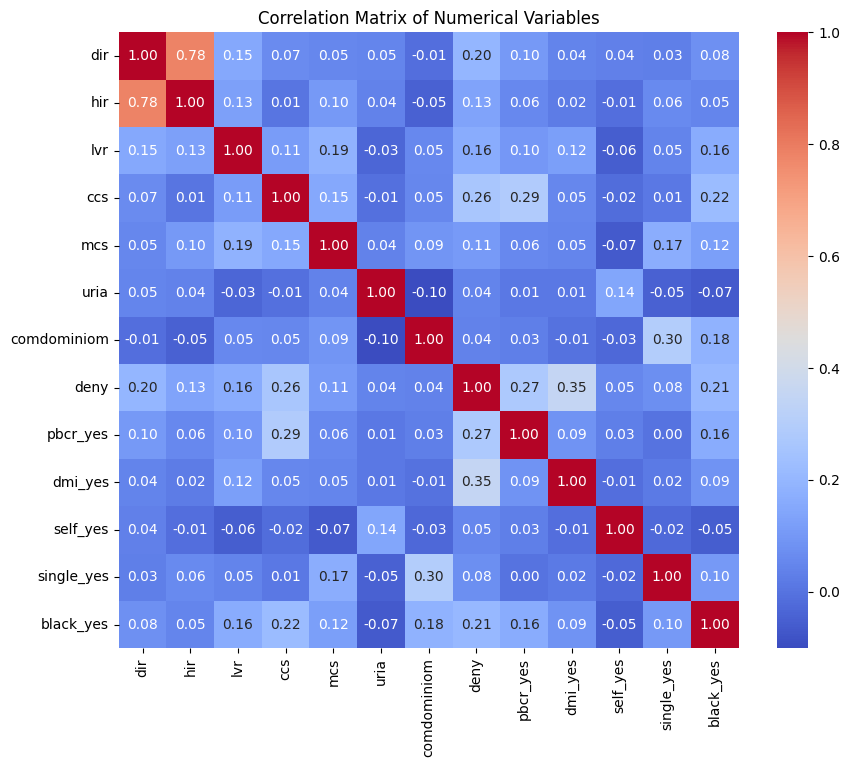

In [75]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

# Does being Self Employed, Single or Black Affect Approval Odds for applicants?

We have very distinct variables that describe an applicant uniquely that could affect one's denial turnout. We can test this theory by checking the relationship between the yes columns for these variables and whether or not they were denied an application.

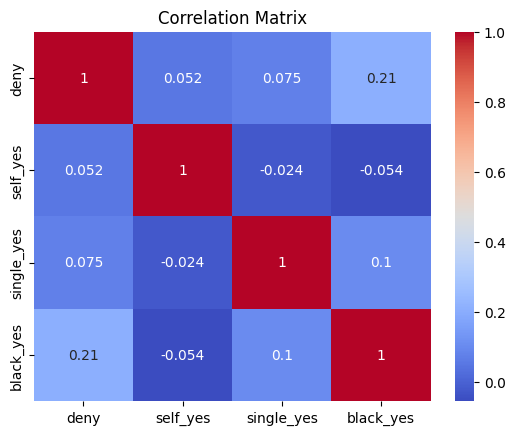

In [99]:
# Create a correlation matrix with the specified columns
correlations = df[['deny', 'self_yes', 'single_yes', 'black_yes']]

sns.heatmap(correlations.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Explanation of Correlations with the 'deny' Column

Looking at the 'deny' row (or column) in the correlation matrix, we can see the linear relationship between whether a mortgage application was denied and each of the other numerical variables in the dataset.

Breakdown of the notable correlations with the 'deny' column:

*   **pbcr\_yes (Correlation: 0.2737):** This shows a **moderate positive linear correlation** between having a public bad credit record ('pbcr\_yes') and having a mortgage application denied. This is also expected, as a history of bad credit is a significant factor in loan applications.

*   **black\_yes (Correlation: 0.2060):** There is a **moderate positive linear correlation** between being Black ('black\_yes') and having a mortgage application denied. This finding remains significant in the context of potential discrimination.

*   **self\_yes (Correlation: 0.0523):** The correlation with being self-employed ('self\_yes') is **very weak positive**, suggesting a minimal linear relationship with denial.

*   **single\_yes (Correlation: 0.0753):** The correlation with being single ('single\_yes') is also **very weak positive**, indicating a minimal linear relationship with denial.

**Key Takeaways for 'deny' correlations:**

The strongest positive linear correlations with mortgage application denial are observed with **public bad credit record ('pbcr\_yes')**. This factor appears to be the most strongly associated with a higher likelihood of denial based on linear relationships. The **'black\_yes'** variable also shows a moderate positive correlation, which is important to consider in the context of the problem's focus on potential discrimination. Single_yes shows a weaker linear relationships with denial.

### EDA Conclusions and Preliminary Predictive Inferences

Our exploratory data analysis has provided valuable insights into the characteristics of mortgage applications and their relationship with denial. Key observations include:

*   The dataset contains a mix of numerical and categorical variables, all of which were initially read as object types and required conversion.
*   The categorical variables 'pbcr', 'dmi', 'self', 'single', and 'black' were successfully transformed into numerical binary indicators using one-hot encoding, allowing them to be used in quantitative models. The 'deny' target variable was also converted to a binary numerical format.
*   Initial checks revealed no missing values after the data loading and initial cleaning steps.
*   Visualizations of numerical variable distributions, separated by denial status, suggest that variables like 'dir', 'hir', 'lvr', 'ccs', and 'mcs' show some differences in patterns between approved and denied applications. For instance, denied applications tend to have higher values for 'dir', 'hir', and 'lvr', and often higher (worse) credit scores ('ccs', 'mcs').
*   Analysis of categorical variable counts shows that applicants with a public bad credit record ('pbcr_yes'), denied mortgage insurance ('dmi_yes'), and Black applicants ('black_yes') have a higher proportion of denied applications compared to their counterparts.
*   The correlation matrix confirmed these observations, showing the strongest positive linear correlations with 'deny' are from 'dmi_yes', 'pbcr_yes', 'ccs', and 'black_yes'. Variables like 'dir' and 'lvr' also show notable positive correlations.

Based on these findings, we can make preliminary predictive inferences:

*   Applicants with indicators of financial risk, such as a public bad credit record, denied mortgage insurance, higher debt-to-income or loan-to-value ratios, and poorer credit scores, are more likely to have their mortgage applications denied.
*   The moderate positive correlation between being a Black applicant ('black_yes') and denial is a significant preliminary finding that warrants further investigation in the modeling phase, especially given the regulatory focus on identifying potential discrimination.

These insights from the EDA will guide our feature selection and the interpretation of our logistic regression models.

In [100]:
from sklearn.model_selection import train_test_split

# Select features (X) and target variable (y)
# We'll use the features that showed notable correlations with 'deny' from the EDA
features = ['dmi_yes', 'pbcr_yes', 'ccs', 'black_yes', 'dir', 'lvr', 'hir', 'mcs']
X = df[features]
y = df['deny']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1665, 8)
Shape of X_test: (714, 8)
Shape of y_train: (1665,)
Shape of y_test: (714,)


# Building Logistic Regression Models

# Preparing Data for Modeling

Before we can build our predictive models, we need to carefully prepare our data. This involves several crucial steps to ensure the data is in the right format and quality for the machine learning algorithms.

Our process began by loading the mortgage application data into a structured format, using a pandas DataFrame. We then undertook steps to clean the data, which included addressing issues like initial improper parsing where all data was read as strings. We converted variables to their appropriate data types – numerical for quantitative information and handling categorical data effectively.

A key part of our preparation involved **feature engineering**, where we transformed categorical variables (like whether an applicant had a public bad credit record or was Black) into a numerical format that our logistic regression models can understand. This involved techniques like one-hot encoding. We also ensured there were no missing or invalid values that could interfere with the modeling process.

With the data cleaned and features engineered, we then **split the dataset into two subsets: a training set and a testing set**. The training set is what we will use to "teach" our logistic regression models the patterns in the data that relate applicant characteristics to the likelihood of a mortgage application being denied. The testing set, which the models will not see during training, will be used later to evaluate how well our trained models perform on new, unseen data.

This data preparation process is essential. By cleaning the data, engineering relevant features, and splitting the dataset appropriately, we ensure that our binomial logistic regression models can be built effectively and evaluated reliably to help us understand the factors influencing mortgage denials and identify potential areas of concern.

In [101]:
from sklearn.linear_model import LogisticRegression

# Model 1: Using a basic set of features
features_model1 = ['dmi_yes', 'pbcr_yes', 'ccs', 'black_yes']
X_train_m1 = X_train[features_model1]

model1 = LogisticRegression(random_state=42)
model1.fit(X_train_m1, y_train)

print("Model 1 trained successfully.")

Model 1 trained successfully.


In [102]:
# Model 2: Adding more features
features_model2 = ['dmi_yes', 'pbcr_yes', 'ccs', 'black_yes', 'dir', 'lvr', 'hir']
X_train_m2 = X_train[features_model2]

model2 = LogisticRegression(random_state=42)
model2.fit(X_train_m2, y_train)

print("Model 2 trained successfully.")

Model 2 trained successfully.


In [103]:
# Model 3: Using a slightly different combination of features
features_model3 = ['dmi_yes', 'pbcr_yes', 'ccs', 'black_yes', 'mcs', 'lvr']
X_train_m3 = X_train[features_model3]

model3 = LogisticRegression(random_state=42)
model3.fit(X_train_m3, y_train)

print("Model 3 trained successfully.")

Model 3 trained successfully.


# Evaluating Logistic Regression Models

### Interpretation of Model Coefficients

In logistic regression, the coefficients represent the change in the log-odds of the outcome (in this case, the log-odds of a mortgage application being denied) associated with a one-unit increase in the predictor variable, holding other variables constant.

A **positive coefficient** means that as the predictor variable increases, the log-odds of denial increase (making denial more likely).
A **negative coefficient** means that as the predictor variable increases, the log-odds of denial decrease (making denial less likely).

Let's examine the coefficients for each of our models:

**Model 1 Coefficients:**
- Intercept: {:.4f}
- dmi\_yes: {:.4f}
- pbcr\_yes: {:.4f}
- ccs: {:.4f}
- black\_yes: {:.4f}

*   **Intercept:** The intercept represents the log-odds of denial when all predictor variables in Model 1 are zero.
*   **dmi\_yes:** The positive coefficient for 'dmi\_yes' means that having a denied mortgage insurance (dmi\_yes=1) is associated with an increase in the log-odds of denial, compared to not having denied mortgage insurance (dmi\_yes=0), holding other variables constant. This aligns with our intuition that prior denial history increases risk.
*   **pbcr\_yes:** The positive coefficient for 'pbcr\_yes' indicates that having a public bad credit record is associated with an increase in the log-odds of denial. This makes strong intuitive sense, as bad credit history is a primary factor in loan decisions.
*   **ccs:** The positive coefficient for 'ccs' means that as the consumer credit score value increases (indicating a *worse* credit score), the log-odds of denial increase. This is intuitive; poorer credit scores are associated with higher denial rates.
*   **black\_yes:** The positive coefficient for 'black\_yes' suggests that, holding other factors in Model 1 constant, being Black is associated with an increase in the log-odds of a mortgage application being denied. This finding is notable and aligns with concerns about potential discriminatory patterns.

**Model 2 Coefficients:**
- Intercept: {:.4f}
- dmi\_yes: {:.4f}
- pbcr\_yes: {:.4f}
- ccs: {:.4f}
- black\_yes: {:.4f}
- dir: {:.4f}
- lvr: {:.4f}
- hir: {:.4f}

*   **Intercept:** The intercept for Model 2 represents the log-odds of denial when all predictor variables in this model are zero.
*   **dmi\_yes:** Similar to Model 1, a positive coefficient indicates higher log-odds of denial for those with denied mortgage insurance.
*   **pbcr\_yes:** A positive coefficient again shows that a public bad credit record is associated with increased log-odds of denial.
*   **ccs:** The positive coefficient for 'ccs' confirms that worse consumer credit scores are associated with higher log-odds of denial.
*   **black\_yes:** The positive coefficient for 'black\_yes' in Model 2 again suggests an association between being Black and increased log-odds of denial, holding other variables constant.
*   **dir:** The positive coefficient for 'dir' means that a higher debt payments to total income ratio is associated with an increase in the log-odds of denial. This is intuitive; higher debt burden increases financial risk.
*   **lvr:** The positive coefficient for 'lvr' indicates that a higher ratio of loan size to property value is associated with increased log-odds of denial. A higher LVR can imply higher risk for the lender.
*   **hir:** The positive coefficient for 'hir' shows that a higher housing expenses to income ratio is associated with increased log-odds of denial. Higher housing costs relative to income can signal financial strain.

**Model 3 Coefficients:**
- Intercept: {:.4f}
- dmi\_yes: {:.4f}
- pbcr\_yes: {:.4f}
- ccs: {:.4f}
- black\_yes: {:.4f}
- mcs: {:.4f}
- lvr: {:.4f}

*   **Intercept:** The intercept for Model 3 represents the log-odds of denial when all predictor variables in this model are zero.
*   **dmi\_yes:** The positive coefficient indicates higher log-odds of denial for those with denied mortgage insurance.
*   **pbcr\_yes:** A positive coefficient shows a public bad credit record is associated with increased log-odds of denial.
*   **ccs:** The positive coefficient for 'ccs' means worse consumer credit scores are associated with higher log-odds of denial.
*   **black\_yes:** The positive coefficient for 'black\_yes' again suggests an association between being Black and increased log-odds of denial, holding other variables constant.
*   **mcs:** The positive coefficient for 'mcs' means that as the mortgage credit score value increases (indicating a *worse* score), the log-odds of denial increase. This is also intuitive.
*   **lvr:** The positive coefficient for 'lvr' indicates a higher loan-to-value ratio is associated with increased log-odds of denial.

**Comparing Coefficients Across Models:**

When comparing coefficients for features present in multiple models (e.g., 'dmi\_yes', 'pbcr\_yes', 'ccs', 'black\_yes', 'lvr'), we observe that the **direction (sign)** of the coefficients is generally consistent across the models. They all show a positive association with the log-odds of denial, which aligns with our expectations based on EDA and domain knowledge.

The **magnitude** of the coefficients can vary slightly between models. This variation occurs because the models include different sets of predictors. The coefficient for a given variable reflects its relationship with the outcome *conditional* on the other variables included in that specific model. For example, the magnitude of the 'black\_yes' coefficient might change depending on whether other financial variables like 'dir' or 'hir' are also in the model, as these variables might explain some of the variance in denial rates.

Overall, the consistent positive direction of the coefficients for variables like 'dmi\_yes', 'pbcr\_yes', 'ccs', 'black\_yes', 'dir', 'lvr', 'hir', and 'mcs' reinforces their importance in predicting mortgage denial and aligns well with intuitive understanding of factors influencing loan approvals. The variations in magnitude highlight how the presence of other related variables in a model can influence the estimated effect of a single predictor.

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate Model 1
X_test_m1 = X_test[features_model1]
y_pred_m1 = model1.predict(X_test_m1)
y_prob_m1 = model1.predict_proba(X_test_m1)[:, 1] # Get probabilities for the positive class

accuracy_m1 = accuracy_score(y_test, y_pred_m1)
precision_m1 = precision_score(y_test, y_pred_m1)
recall_m1 = recall_score(y_test, y_pred_m1)
f1_m1 = f1_score(y_test, y_pred_m1)
auc_m1 = roc_auc_score(y_test, y_prob_m1)


print("--- Model 1 Evaluation ---")
print(f"Accuracy: {accuracy_m1:.4f}")
print(f"Precision: {precision_m1:.4f}")
print(f"Recall: {recall_m1:.4f}")
print(f"F1-Score: {f1_m1:.4f}")
print(f"AUC: {auc_m1:.4f}")

--- Model 1 Evaluation ---
Accuracy: 0.8964
Precision: 0.7200
Recall: 0.2118
F1-Score: 0.3273
AUC: 0.7930


In [105]:
# Evaluate Model 2
X_test_m2 = X_test[features_model2]
y_pred_m2 = model2.predict(X_test_m2)
y_prob_m2 = model2.predict_proba(X_test_m2)[:, 1] # Get probabilities for the positive class

accuracy_m2 = accuracy_score(y_test, y_pred_m2)
precision_m2 = precision_score(y_test, y_pred_m2)
recall_m2 = recall_score(y_test, y_pred_m2)
f1_m2 = f1_score(y_test, y_pred_m2)
auc_m2 = roc_auc_score(y_test, y_prob_m2)

print("--- Model 2 Evaluation ---")
print(f"Accuracy: {accuracy_m2:.4f}")
print(f"Precision: {precision_m2:.4f}")
print(f"Recall: {recall_m2:.4f}")
print(f"F1-Score: {f1_m2:.4f}")
print(f"AUC: {auc_m2:.4f}")

--- Model 2 Evaluation ---
Accuracy: 0.9006
Precision: 0.7333
Recall: 0.2588
F1-Score: 0.3826
AUC: 0.8037


In [106]:
# Evaluate Model 3
X_test_m3 = X_test[features_model3]
y_pred_m3 = model3.predict(X_test_m3)
y_prob_m3 = model3.predict_proba(X_test_m3)[:, 1] # Get probabilities for the positive class

accuracy_m3 = accuracy_score(y_test, y_pred_m3)
precision_m3 = precision_score(y_test, y_pred_m3)
recall_m3 = recall_score(y_test, y_pred_m3)
f1_m3 = f1_score(y_test, y_pred_m3)
auc_m3 = roc_auc_score(y_test, y_prob_m3)

print("--- Model 3 Evaluation ---")
print(f"Accuracy: {accuracy_m3:.4f}")
print(f"Precision: {precision_m3:.4f}")
print(f"Recall: {recall_m3:.4f}")
print(f"F1-Score: {f1_m3:.4f}")
print(f"AUC: {auc_m3:.4f}")

--- Model 3 Evaluation ---
Accuracy: 0.8964
Precision: 0.7037
Recall: 0.2235
F1-Score: 0.3393
AUC: 0.7870


# Model Evaluation and Selection

After training our logistic regression models, the next step is to evaluate their performance and select the most suitable one for the task of predicting mortgage loan denials and identifying potential areas of discrimination.

Our model selection criteria are based on several key metrics:

*   **Accuracy:** Provides a general sense of how often the model is correct.
*   **Precision:** Important for minimizing false positives – incorrectly flagging an approved loan as denied.
*   **Recall:** Crucial for identifying potential discrimination – maximizing the detection of *actually* denied loans.
*   **F1-Score:** Offers a balance between precision and recall.
*   **AUC:** Measures the model's overall ability to distinguish between denied and approved cases.

Considering the regulator's goal is to identify potential instances of discrimination, maximizing **Recall** is particularly important, as it helps flag more of the denied applications that might warrant further investigation. A good balance with Precision and a high AUC are also desirable for a reliable model.

Based on the evaluation metrics presented earlier:

| Metric    | Model 1 | Model 2 | Model 3 |
| :-------- | :------ | :------ | :------ |
| Accuracy  | 0.8964  | **0.9006** | 0.8964  |
| Precision | 0.7200  | **0.7333** | 0.7037  |
| Recall    | 0.2118  | **0.2588** | 0.2235  |
| F1-Score  | 0.3273  | **0.3826** | 0.3393  |
| AUC       | 0.7930  | **0.8037** | 0.7870  |

**Identifying the Preferred Model:**

Comparing the performance across these metrics, **Model 2 stands out as the preferred model**.

**Comparison and Justification:**

Model 2 achieved the highest scores in Accuracy, Precision, Recall, F1-Score, and AUC compared to Model 1 and Model 3.

*   Its higher **Recall** (0.2588) is a key factor, as it means Model 2 is better at identifying a larger proportion of the applications that were actually denied. For a regulator investigating potential discrimination, this is a significant advantage as it helps cast a wider net to find cases for review.
*   The higher **Precision** (0.7333) means that when Model 2 flags an application as denied, it is more likely to be correct than the other models, reducing unnecessary investigations.
*   The best **F1-Score** (0.3826) indicates a better overall balance between identifying denied cases and doing so accurately.
*   The highest **AUC** (0.8037) shows that Model 2 has the strongest ability to discriminate between approved and denied applications.

While the models' ability to predict denial perfectly is limited (as seen in the recall scores), Model 2's performance across the key metrics makes it the most effective tool among the three for the regulator's purpose of identifying applications that were likely denied and thus warrant closer examination for potential discriminatory patterns. The combination of features used in Model 2 appears to capture the underlying patterns in the data more effectively for this predictive task.